# Ice Sheets and Climate - Eric Keenan - Homework # 1

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Marine Records
#### 1.b. Benthic $\delta$$^{18}$O has generally been increasing over the last 70 million years. This means that ice volumne has been increasing. As ice sheets grow, $\delta$$^{18}$O depleted water accumulates on ice sheets which means that $\delta$$^{18}$O enriched water accumulates in the ocean. 
#### 1.c. 34 million years ago there was a sudden increase in $\delta$$^{18}$O, this indicates a cooling of the climate. Therefore it is likely that 34 million years ago, ice sheets developed and grew on Earth leading to the observed increase in $\delta$$^{18}$O in the marine record.
#### 1.d. Milankovitch cycles arising from variations in Earth's orbital paramters explain the high frequency variations. Meanwhile, slower tectonic processes manipulate Earth's climate and therefore $\delta$$^{18}$O over longer time scales.


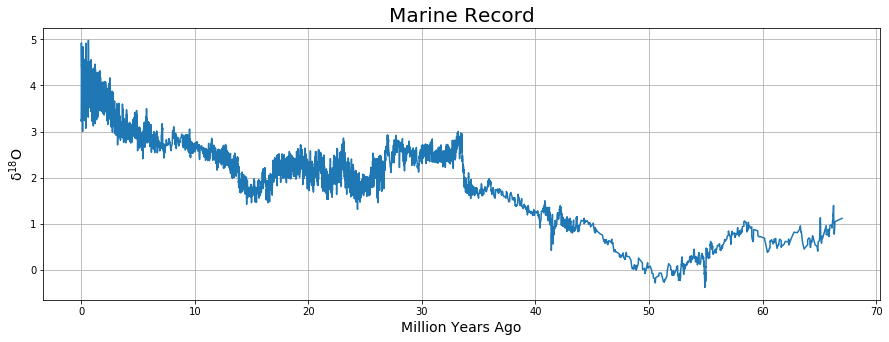

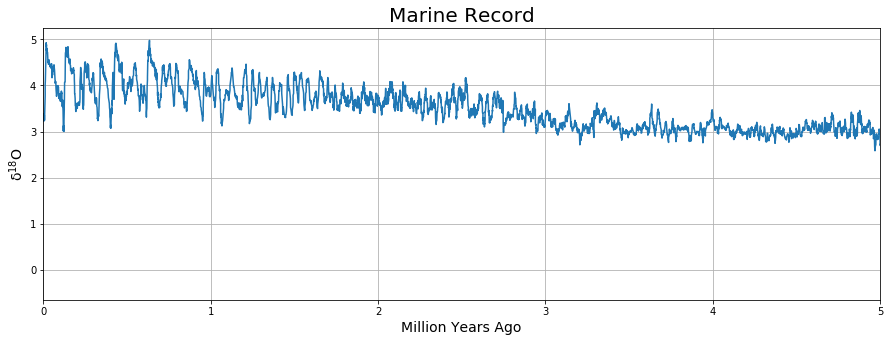

In [26]:
# Load data
file_path="zachos2001.csv"
zachos = pd.read_csv(file_path)
marine_time = zachos['Age (Ma)']
marine_d18O = zachos['d18O(5pt**)']

# Plot last ~70 million years
fig1 = plt.figure(1, figsize=(15,5))
plt.plot(marine_time, marine_d18O)
plt.xlabel("Million Years Ago", fontsize=14)
plt.ylabel("\u03B4$^{18}$O", fontsize=14)
plt.title("Marine Record", fontsize=20)
plt.grid()

# Plot last 5 million years
fig1 = plt.figure(2, figsize=(15,5))
plt.plot(marine_time, marine_d18O)
plt.xlabel("Million Years Ago", fontsize=14)
plt.ylabel("\u03B4$^{18}$O", fontsize=14)
plt.title("Marine Record", fontsize=20)
plt.xlim([0, 5])
plt.grid()

# 2. Ice Core Records
#### 2.f. Accumulation rates must be low enough such that up 1.5 million years of accumulation are present in the ice column. Temperatures must be low enough in order to prevent melt and sublimation from ablating the ice. And ice flow must be minimal so that scientists can be confident that the ice in the core originatated from the drilling location as opposed to advecting there.
       

## GISP2

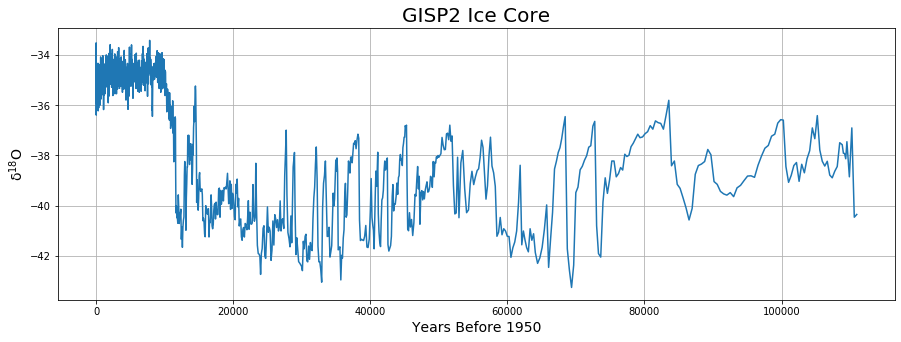

In [27]:
# Load data
file_path="gispd18o.txt"
gisp = np.loadtxt(file_path, skiprows=51)
gisp2_depth = gisp[:,0]
gisp2_d18O = gisp[:,1]
gisp2_age = gisp[:,2]

# Filter data
gisp2_age[gisp2_age > 200000] = np.nan
gisp2_age[gisp2_d18O > 10] = np.nan
gisp2_d18O[gisp2_age > 200000] = np.nan
gisp2_d18O[gisp2_d18O > 10] = np.nan

# Plot 
fig3 = plt.figure(3, figsize=(15,5))
plt.plot(gisp2_age, gisp2_d18O)
plt.xlabel("Years Before 1950", fontsize=14)
plt.ylabel("\u03B4$^{18}$O", fontsize=14)
plt.title("GISP2 Ice Core", fontsize=20)
plt.grid()

## Dome Fuji

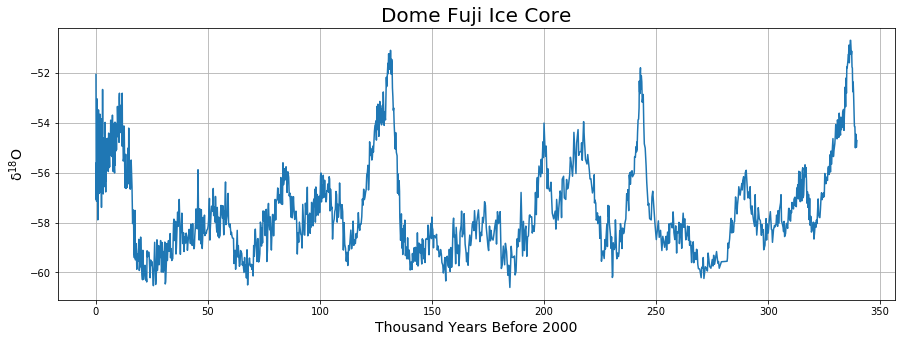

In [28]:
# Load data
file_path="df2012isotope-temperature.txt"
df = np.loadtxt(file_path, skiprows=1, usecols=(1,2,3,4,5,6,7))
df_age = df[:,3]
df_d18O = df[:,4]

# Plot 
fig4 = plt.figure(4, figsize=(15,5))
plt.plot(df_age, df_d18O)
plt.xlabel("Thousand Years Before 2000", fontsize=14)
plt.ylabel("\u03B4$^{18}$O", fontsize=14)
plt.title("Dome Fuji Ice Core", fontsize=20)
plt.grid()

## GISP2 and Dome Fuji

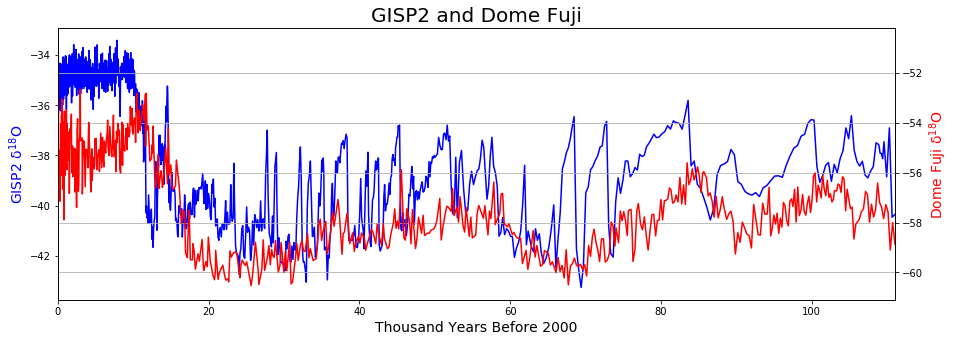

In [29]:
# Data manipulations, convert to thousands of years before 2000
gisp2_age_yb2000 = (gisp2_age + 50) / 1000
df_age_yb2000 = df_age 
gisp2_max = np.nanmax(gisp2_age_yb2000)

# Plot 
fig5, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(gisp2_age_yb2000, gisp2_d18O, 'b')
ax2.plot(df_age_yb2000, df_d18O, 'r')
ax1.set_xlabel("Thousand Years Before 2000", fontsize=14)
ax1.set_ylabel("GISP2 \u03B4$^{18}$O", fontsize=14, color='b')
ax2.set_ylabel("Dome Fuji \u03B4$^{18}$O", fontsize=14, color='r')
plt.title("GISP2 and Dome Fuji", fontsize=20)
plt.xlim([0, gisp2_max])
plt.grid()


## Ice Cores and Marine Cores

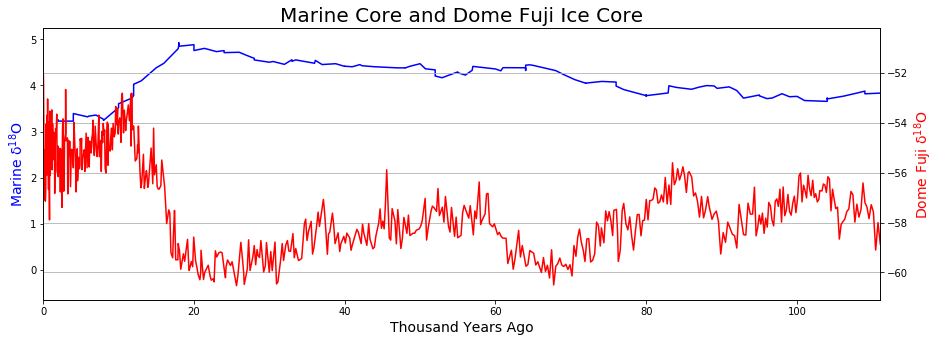

In [30]:
# Data manipulations, convert to thousands of years ago
df_age_yb2000 = df_age 
marine_time_yb2000 = marine_time * 1000
df_max = np.nanmax(df_age_yb2000)

# Plot 
fig6, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(marine_time_yb2000, marine_d18O, 'b')
ax2.plot(df_age_yb2000, df_d18O, 'r')
ax1.set_xlabel("Thousand Years Ago", fontsize=14)
ax1.set_ylabel("Marine \u03B4$^{18}$O", fontsize=14, color='b')
ax2.set_ylabel("Dome Fuji \u03B4$^{18}$O", fontsize=14, color='r')
plt.title("Marine Core and Dome Fuji Ice Core", fontsize=20)
plt.xlim([0, gisp2_max])
plt.grid()